In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt

In [117]:
#np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
np.set_printoptions(precision=4)

In [143]:
n = 20000

In [144]:
v = np.zeros(n)
v[0] = 1
v = v.reshape(n,1)

In [145]:
G = nx.random_graphs.connected_watts_strogatz_graph(n, 3, 1)

In [146]:
#G = nx.path_graph(5)

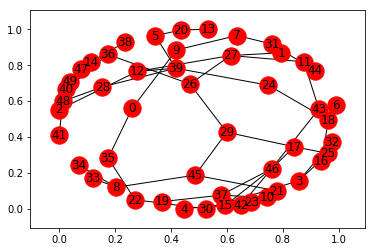

In [63]:
nx.draw_networkx(G,with_labels=True)
plt.show()

In [149]:
#W = nx.to_numpy_matrix(G)
#W

In [150]:
W = nx.google_matrix(G, alpha=0.85)

matrix([[  7.5000e-06,   7.5000e-06,   7.5000e-06, ...,   7.5000e-06,
           7.5000e-06,   7.5000e-06],
        [  7.5000e-06,   7.5000e-06,   7.5000e-06, ...,   7.5000e-06,
           7.5000e-06,   7.5000e-06],
        [  7.5000e-06,   7.5000e-06,   7.5000e-06, ...,   7.5000e-06,
           7.5000e-06,   7.5000e-06],
        ..., 
        [  7.5000e-06,   7.5000e-06,   7.5000e-06, ...,   7.5000e-06,
           7.5000e-06,   7.5000e-06],
        [  7.5000e-06,   7.5000e-06,   7.5000e-06, ...,   7.5000e-06,
           7.5000e-06,   7.5000e-06],
        [  7.5000e-06,   7.5000e-06,   7.5000e-06, ...,   7.5000e-06,
           7.5000e-06,   7.5000e-06]])

In [151]:
v2 = v

In [162]:
for i in range(1):
    v2= W * (v2)
    v2 = v2 + v
    v2 = v2 / sum(v2)



In [163]:
vals = dict()
for i, v in enumerate(np.unwrap(v2)):
    vals[i] = float(v[0].astype(float))

In [164]:
nx.set_node_attributes(G, "energy", vals)

In [165]:
nx.write_gexf(G, "C:\\users\\hatieke\\temp\\test.gexf")

In [166]:
np.histogram(v2)

(array([19996,     0,     0,     1,     0,     1,     0,     0,     1,     1], dtype=int64),
 array([  2.5431e-05,   1.7445e-02,   3.4865e-02,   5.2285e-02,
          6.9705e-02,   8.7125e-02,   1.0454e-01,   1.2196e-01,
          1.3938e-01,   1.5680e-01,   1.7422e-01]))